In [3]:
import pandas as pd
df = pd.read_csv("reviews.csv")

In [4]:
print(df.head())
print(df.info())
print(df.describe())

                                            reviewId  \
0  gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...   
1  gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...   
2  gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...   
3  gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...   
4  gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...   

                           userName  \
0                          Eric Tie   
1                        john alpha   
2                       Sudhakar .S   
3  SKGflorida@bellsouth.net DAVID S   
4                     Louann Stoker   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AOh14...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a-/AOh14...   
3  https://play-lh.googleusercontent.com/-75aK0WF...   
4  https://play-lh.googleusercontent.com/-pBcY_Z-...   

                                             content  score  thumbsUpCount  \
0            

In [5]:
df_clean = df.drop(['userImage', 'replyContent'], axis=1)


In [6]:
df_clean['reviewCreatedVersion'].fillna('Unknown', inplace=True)


In [7]:
import re
df_clean['cleaned_content'] = df_clean['content'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   content               12495 non-null  object
 3   score                 12495 non-null  int64 
 4   thumbsUpCount         12495 non-null  int64 
 5   reviewCreatedVersion  12495 non-null  object
 6   at                    12495 non-null  object
 7   repliedAt             5818 non-null   object
 8   sortOrder             12495 non-null  object
 9   appId                 12495 non-null  object
 10  cleaned_content       12495 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.0+ MB


In [10]:
df_clean['repliedAt'].fillna('No reply', inplace=True)
df_clean['sentiment_label'] = df_clean['score'].apply(lambda x: 'negative' if x <= 2 else 'neutral' if x == 3 else 'positive')


In [11]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   content               12495 non-null  object
 3   score                 12495 non-null  int64 
 4   thumbsUpCount         12495 non-null  int64 
 5   reviewCreatedVersion  12495 non-null  object
 6   at                    12495 non-null  object
 7   repliedAt             12495 non-null  object
 8   sortOrder             12495 non-null  object
 9   appId                 12495 non-null  object
 10  cleaned_content       12495 non-null  object
 11  sentiment_label       12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [15]:
print(df.columns)


Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId'],
      dtype='object')


In [16]:
pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/624.3 kB 262.6 kB/s eta 0:00:03
   ----- --------------------------------- 81.9/624.3 kB 459.5 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/624.3 kB 554.9 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/624.3 kB 1.1 MB/s eta 0:00:01
   ---------------------- ----------------- 358.4/624.3 kB 1.2 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/624.3 kB 1.3 MB/s eta 0:00:01
   -------------------------------------- - 604.2/624.3 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------  614.4/624.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--

In [18]:
import re

# Clean the 'content' column by removing non-alphabetical characters and converting to lowercase
df['cleaned_content'] = df['content'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x.lower()))

# Verify that the 'cleaned_content' column is created
print(df[['content', 'cleaned_content']].head())


                                             content  \
0                      I cannot open the app anymore   
1  I have been begging for a refund from this app...   
2  Very costly for the premium version (approx In...   
3  Used to keep me organized, but all the 2020 UP...   
4                                Dan Birthday Oct 28   

                                     cleaned_content  
0                      i cannot open the app anymore  
1  i have been begging for a refund from this app...  
2  very costly for the premium version approx ind...  
3  used to keep me organized but all the  updates...  
4                                  dan birthday oct   


In [19]:
from textblob import TextBlob

# Function to get the sentiment label
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity as negative, neutral, or positive
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to the 'cleaned_content' column
df['sentiment_label'] = df['cleaned_content'].apply(get_sentiment)

# Verify that the sentiment_label has been added
print(df['sentiment_label'].value_counts())


sentiment_label
positive    8216
neutral     2257
negative    2022
Name: count, dtype: int64


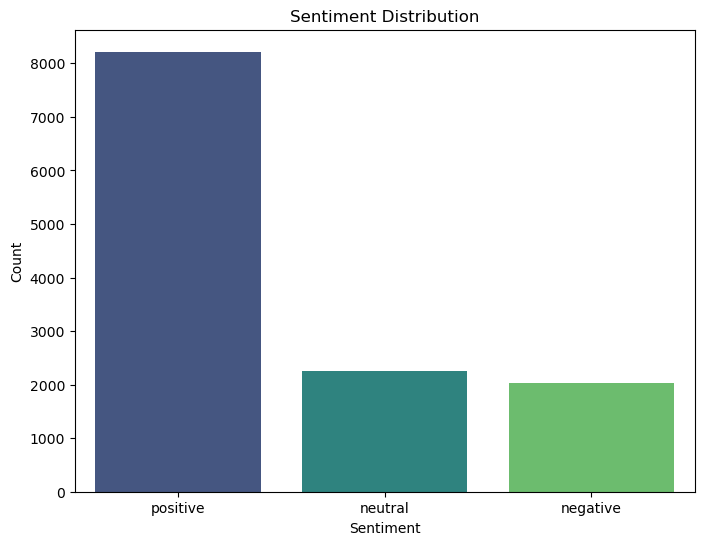

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Distribution (Bar plot)
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


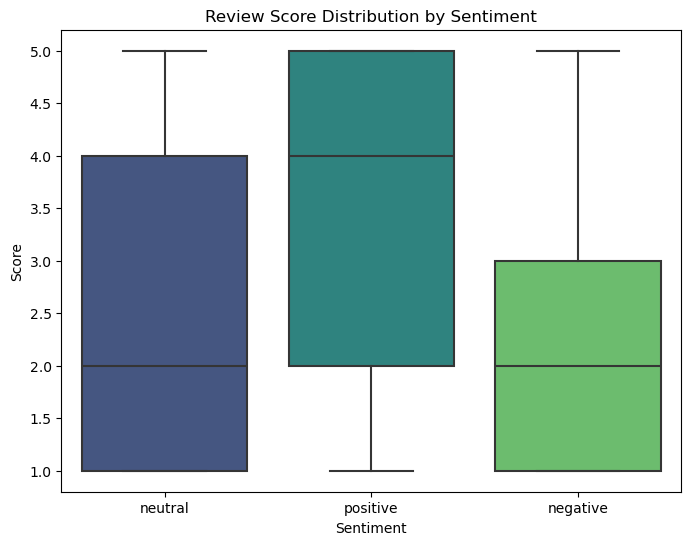

In [21]:
# Boxplot to show review score distribution by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_label', y='score', data=df, palette="viridis")
plt.title('Review Score Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.show()


In [22]:
# Top 5 highest-rated reviews for each sentiment label
top_positive_reviews = df[df['sentiment_label'] == 'positive'].nlargest(5, 'score')
top_neutral_reviews = df[df['sentiment_label'] == 'neutral'].nlargest(5, 'score')
top_negative_reviews = df[df['sentiment_label'] == 'negative'].nlargest(5, 'score')

print("Top 5 Positive Reviews:\n", top_positive_reviews[['userName', 'content', 'score']])
print("\nTop 5 Neutral Reviews:\n", top_neutral_reviews[['userName', 'content', 'score']])
print("\nTop 5 Negative Reviews:\n", top_negative_reviews[['userName', 'content', 'score']])


Top 5 Positive Reviews:
              userName                                            content  \
750    Tyler Fletcher  This app is awesome. I am currently using the ...   
751  kirill Levchenko                                      Great product   
752       Chimmie Eze           Great app, helps me to plan my day ahead   
753              Leon  This app is amazing, changed my life. I'm doin...   
754      Rajesh Waran                                        Good app 🙂👍   

     score  
750      5  
751      5  
752      5  
753      5  
754      5  

Top 5 Neutral Reviews:
                        userName                     content  score
763              michael lehman                         Yrp      5
764  Love you so? Love you too?                   Aungwaioo      5
769                     ko poeT             i like that app      5
771                Mijanur sekh  মোবাইল নাম্বার সেটিং অ্যাপ      5
774               Maryam Talebi                       عالیه      5

Top 5 Negati

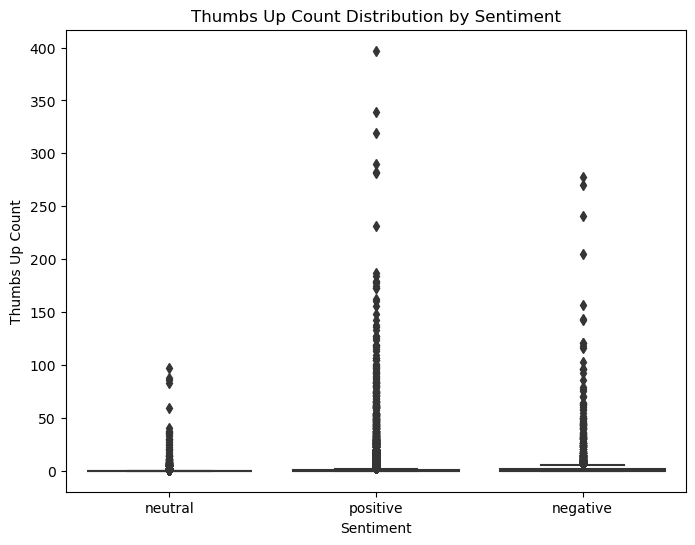

In [23]:
# Boxplot for thumbs up count distribution by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_label', y='thumbsUpCount', data=df, palette="viridis")
plt.title('Thumbs Up Count Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Thumbs Up Count')
plt.show()


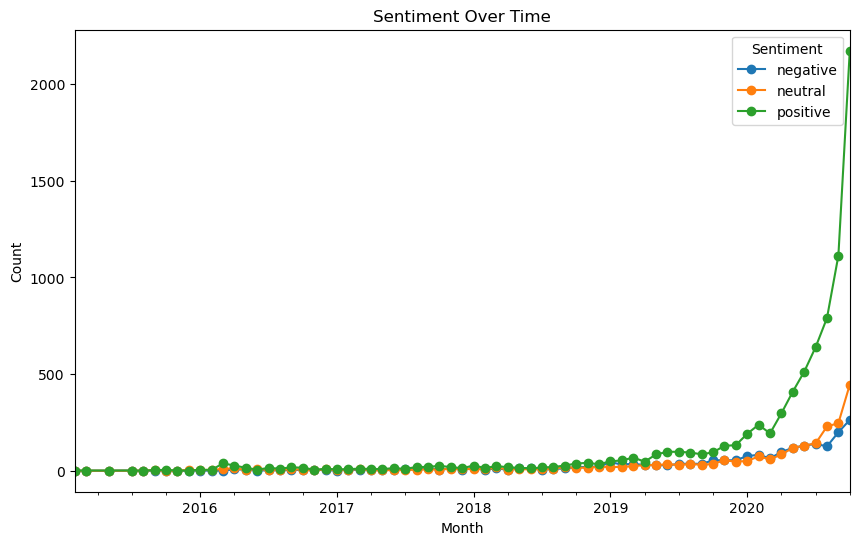

In [24]:
# Convert 'at' column to datetime
df['at'] = pd.to_datetime(df['at'])

# Group by month and sentiment
df['month'] = df['at'].dt.to_period('M')
sentiment_over_time = df.groupby(['month', 'sentiment_label']).size().unstack().fillna(0)

# Plot sentiment over time
sentiment_over_time.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


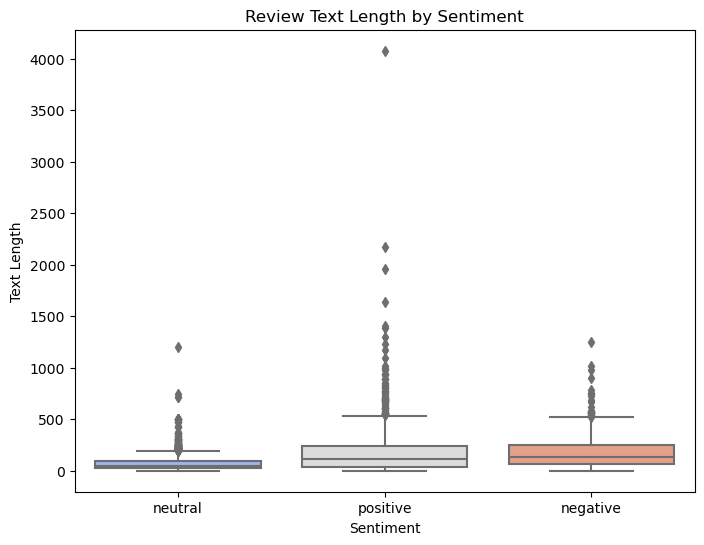

In [25]:
# Add new column for text length
df['text_length'] = df['content'].apply(len)

# Plot average text length by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_label', y='text_length', data=df, palette="coolwarm")
plt.title('Review Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()


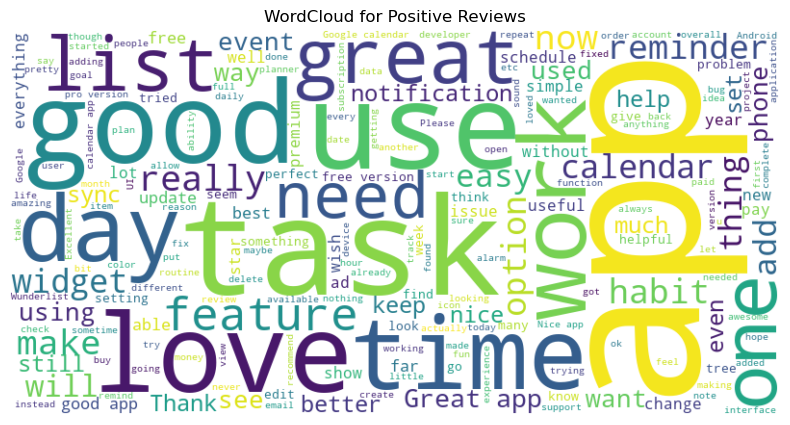

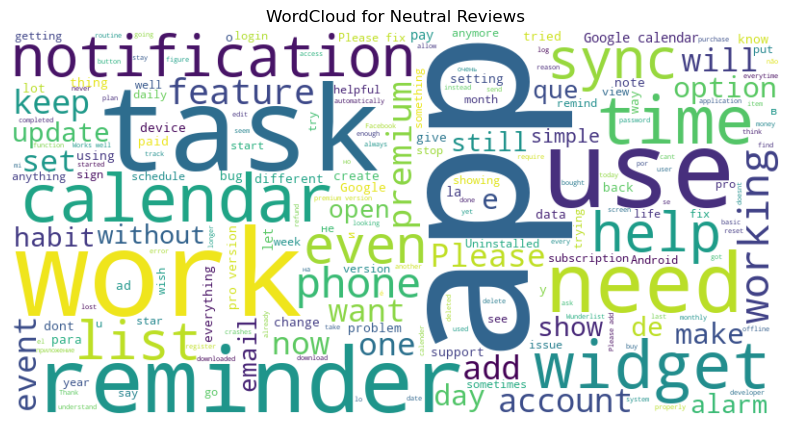

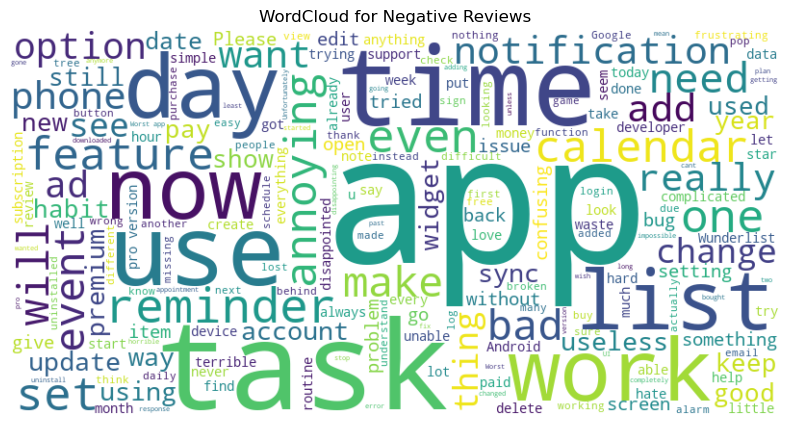

In [26]:
from wordcloud import WordCloud

# Generate WordClouds
for sentiment in ['positive', 'neutral', 'negative']:
    text = " ".join(df[df['sentiment_label'] == sentiment]['content'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {sentiment.capitalize()} Reviews')
    plt.axis('off')
    plt.show()


In [27]:
# Top reviews by thumbs up
top_helpful_reviews = df.nlargest(10, 'thumbsUpCount')[['userName', 'content', 'thumbsUpCount', 'sentiment_label']]
print(top_helpful_reviews)


                userName                                            content  \
12020      Deanna Wedell  I like this app very much, because it's fairly...   
12187      Shirley Smart  I really like this app - its a lovely interfac...   
1274        Love Instead  Seems like a good tool, but almost nothing tha...   
3977            Frooggle  I really loved this app. I used it regularly a...   
846    Anthony F. Norris  Excellent customer service and very reasonable...   
4371       Sapphire Blue  I absolutely love this!! I love using the deep...   
5023        Nick Andrews  It seems like this app is no longer supported....   
649       Michael Gordon  Great tool. I use it every day. There's a bug,...   
9982    Sian Butterfield  Had high hopes for this because it had everyth...   
461           First Last  The latest app update (7/26/20), "new app navi...   

       thumbsUpCount sentiment_label  
12020            397        positive  
12187            339        positive  
1274         

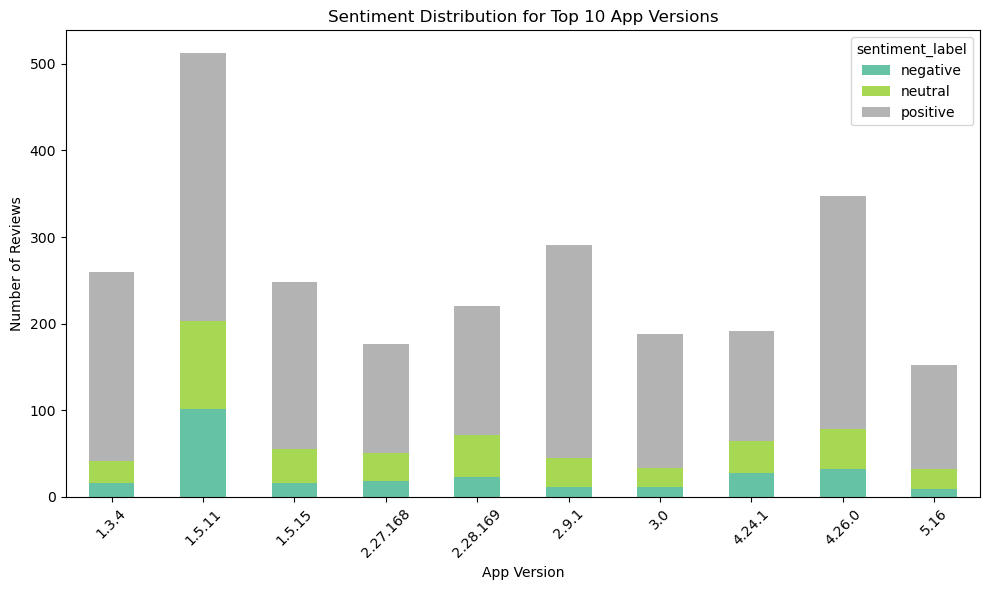

In [32]:
# Top 10 versions with most reviews
top_versions = df['reviewCreatedVersion'].value_counts().nlargest(10).index

# Filter the DataFrame
filtered_df = df[df['reviewCreatedVersion'].isin(top_versions)]

# Group and plot
version_sentiment = filtered_df.groupby(['reviewCreatedVersion', 'sentiment_label']).size().unstack().fillna(0)
version_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Sentiment Distribution for Top 10 App Versions')
plt.xlabel('App Version')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


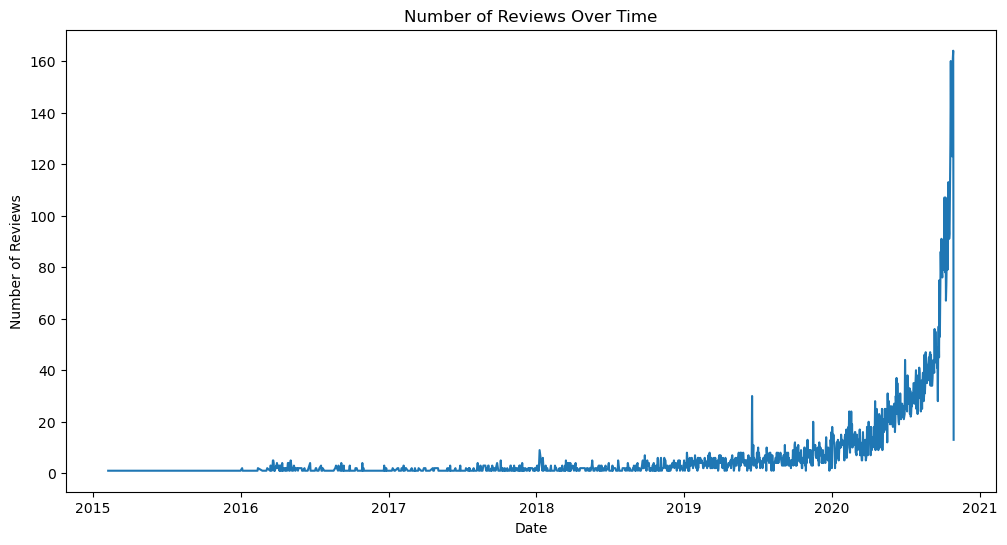

In [29]:
# Daily review count
daily_reviews = df.groupby(df['at'].dt.date).size()

# Plot
plt.figure(figsize=(12, 6))
daily_reviews.plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()



In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform(df['content'])

sum_words = bigrams.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Display top 10 bigrams
print("Top 10 most common bigrams:")
for word, freq in words_freq[:10]:
    print(f"{word}: {freq}")


Top 10 most common bigrams:
great app: 515
good app: 380
love app: 361
easy use: 328
pro version: 263
google calendar: 256
free version: 248
like app: 197
nice app: 179
use app: 178


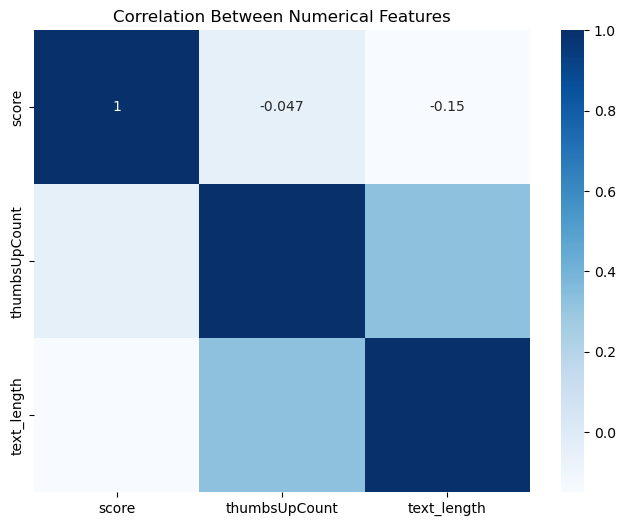

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['score', 'thumbsUpCount', 'text_length']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Numerical Features')
plt.show()


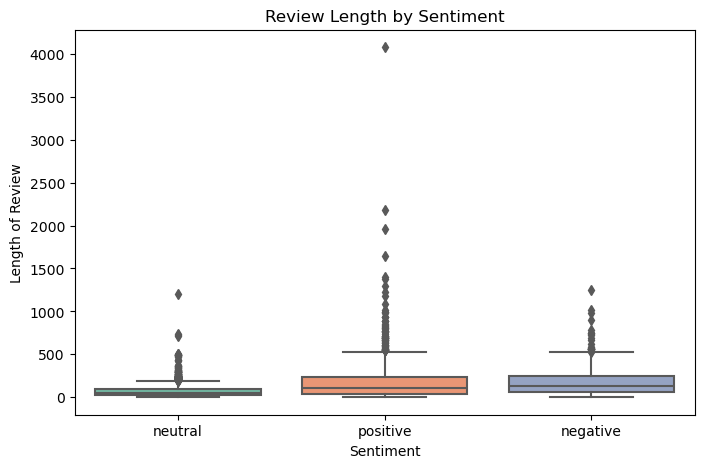

In [33]:
# Add review length column
df['review_length'] = df['content'].apply(len)

# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment_label', y='review_length', data=df, palette='Set2')
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Length of Review')
plt.show()


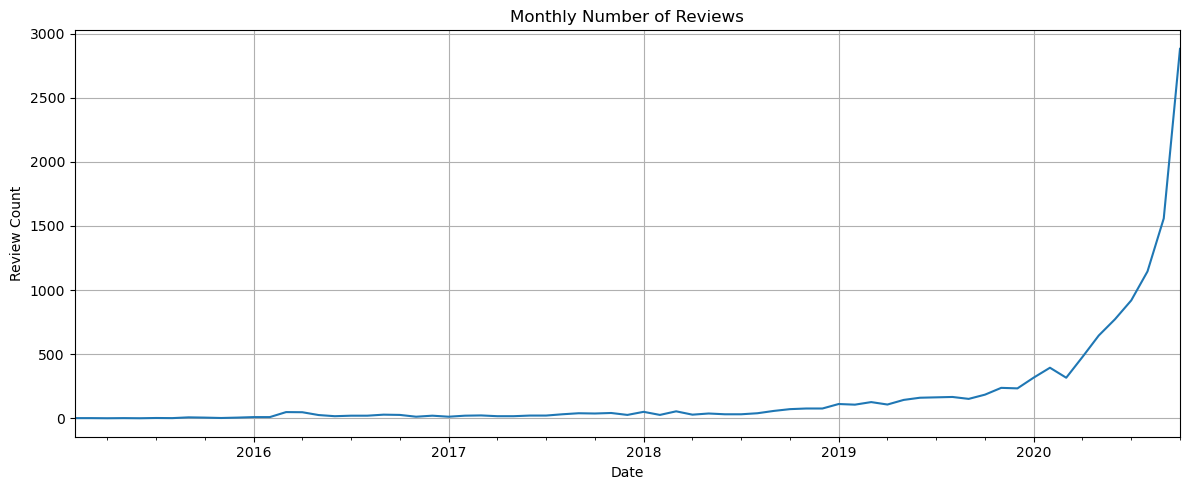

In [34]:
# Convert date column
df['at'] = pd.to_datetime(df['at'])

# Reviews per month
monthly_reviews = df.set_index('at').resample('M').size()

plt.figure(figsize=(12, 5))
monthly_reviews.plot()
plt.title('Monthly Number of Reviews')
plt.xlabel('Date')
plt.ylabel('Review Count')
plt.grid(True)
plt.tight_layout()
plt.show()


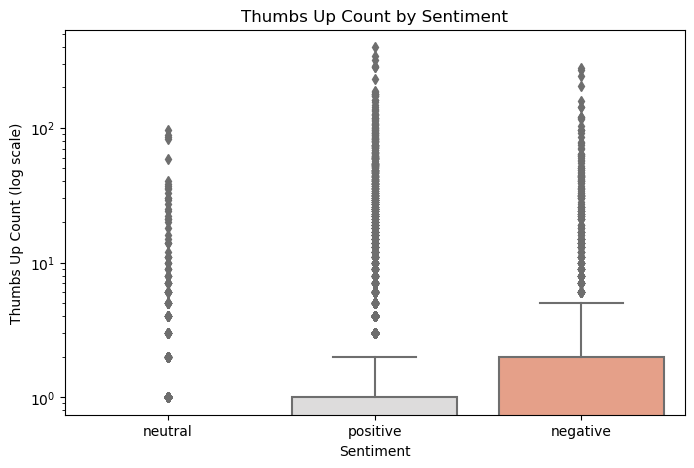

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment_label', y='thumbsUpCount', data=df, palette='coolwarm')
plt.yscale('log')  # Because some counts may be very large
plt.title('Thumbs Up Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Thumbs Up Count (log scale)')
plt.show()


## TIME BASED TRENDS


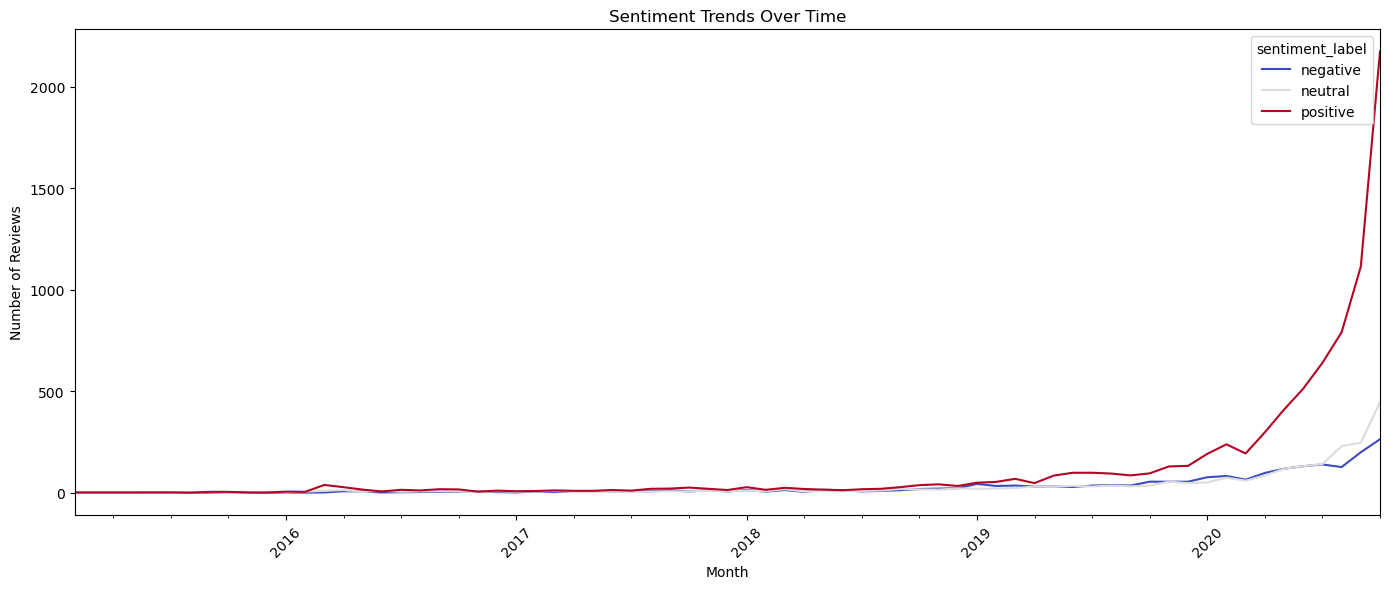

In [37]:
df['at'] = pd.to_datetime(df['at'])

# Group by month and sentiment
time_sentiment = df.groupby([df['at'].dt.to_period('M'), 'sentiment_label']).size().unstack().fillna(0)
time_sentiment.plot(figsize=(14, 6), title="Sentiment Trends Over Time", colormap="coolwarm")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## HELPFULNESS OF REVIEWS

In [39]:
helpfulness = df.groupby('sentiment_label')['thumbsUpCount'].mean()
print(helpfulness)


sentiment_label
negative    4.157765
neutral     0.799734
positive    3.391675
Name: thumbsUpCount, dtype: float64


## CONCLUSION